In [1]:
import numpy as np
from pydae.tools import get_v,get_i,get_s,save,load
from pydae.train_tools import trains_update,trains2params
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets

In [2]:
%matplotlib widget

In [3]:
from grid_railway_5vsc import grid_railway_5vsc_class

In [10]:
grid_railway = grid_railway_5vsc_class()
data_input = load('trains_lv_5vsc_params.json')   # See _builder for .json creation

params_dict = {'K_r':1*0.05*3e3/200e3*0}
for bus in ['B2','B3','B4','B5','B6']:
    for ph in ['a','b','c']:
        params_dict.update({f'q_{bus}lv_{ph}':0.0})
        params_dict.update({f'a_{bus}lv':0.0})
        params_dict.update({f'b_{bus}lv':0.0})
        params_dict.update({f'c_{bus}lv':0.0})
        
grid_railway.initialize([params_dict],"xy_0_dict.json")

True

### Train update function

In [13]:
rho = 1.72e-8    # copper conductivity
s = 150.0/1.0e6  # conductor section m^2
r_m = rho/s  # Ohm/m  

def update_trains(t,grid_railway):
    """
    t : time in seconds
    
    """
    train_positions_list,train_powers_list = trains_update(t,data_input['trains'],data_input['trips'])
    params_dict,nodes_dict = trains2params(data_input['sections'],train_positions_list,train_powers_list,r_m)   # for the given trains the topology in defined

    for item in params_dict:
        grid_railway.set_value(item,params_dict[item])

    grid_railway.ss()
    
    return nodes_dict,train_positions_list

update_trains(100,grid_railway)

grid_railway.report_y()

v_B2lv_a_r = 732.64
v_B2lv_a_i = -447.64
v_B2lv_b_r = -753.99
v_B2lv_b_i = -410.67
v_B2lv_c_r = 21.35
v_B2lv_c_i = 858.31
v_B2lv_n_r =  0.00
v_B2lv_n_i = -0.00
v_B3lv_a_r = 738.16
v_B3lv_a_i = -441.57
v_B3lv_b_r = -751.49
v_B3lv_b_i = -418.48
v_B3lv_c_r = 13.33
v_B3lv_c_i = 860.05
v_B3lv_n_r = -0.00
v_B3lv_n_i = -0.00
v_B4lv_a_r = 746.37
v_B4lv_a_i = -433.39
v_B4lv_b_r = -748.51
v_B4lv_b_i = -429.68
v_B4lv_c_r =  2.14
v_B4lv_c_i = 863.07
v_B4lv_n_r =  0.00
v_B4lv_n_i =  0.00
v_B5lv_a_r = 740.05
v_B5lv_a_i = -440.34
v_B5lv_b_r = -751.37
v_B5lv_b_i = -420.73
v_B5lv_c_r = 11.32
v_B5lv_c_i = 861.07
v_B5lv_n_r =  0.00
v_B5lv_n_i = -0.00
v_B6lv_a_r = 738.34
v_B6lv_a_i = -442.80
v_B6lv_b_r = -752.65
v_B6lv_b_i = -418.02
v_B6lv_c_r = 14.31
v_B6lv_c_i = 860.83
v_B6lv_n_r =  0.00
v_B6lv_n_i =  0.00
v_B2_a_r = 11517.42
v_B2_a_i = -19.77
v_B2_b_r = -5775.83
v_B2_b_i = -9964.49
v_B2_c_r = -5741.59
v_B2_c_i = 9984.26
v_B3_a_r = 11507.24
v_B3_a_i = -27.83
v_B3_b_r = -5777.72
v_B3_b_i = -9951.64
v_B3_

### Main loop without droop

In [14]:
1259067.02/3

419689.00666666665

In [22]:
grid_railway = grid_railway_5vsc_class()

params_dict = {'K_r':1*0.05*3e3/200e3*0}
for bus in ['B2','B3','B4','B5','B6']:
    for ph in ['a','b','c']:
        params_dict.update({f'q_{bus}lv_{ph}':0.0})
        
grid_railway.initialize([params_dict],"xy_0_dict.json")

times = np.arange(0,30*60,2)

v_dc_buses = [f"v_{bus['bus']}" for bus in data_input['buses']]
ac_dc_buses = [('B2','13'),('B3','23'),('B4','33'),('B5','43'),('B6','53')]
p_dc_buses = [f"p_{dc_bus}" for ac_bus,dc_bus in ac_dc_buses]

v_ac_buses_r = [f"v_{bus[0]}_a_r" for bus in  ac_dc_buses ]
v_ac_buses_i = [f"v_{bus[0]}_a_i" for bus in  ac_dc_buses ]
node_pos = []
train_pos = []
powers_dc = []
voltages_dc = []
voltages_ac = []
for t in times:
    nodes_dict,train_positions_list = update_trains(t,grid_railway)

    voltages_dc += [grid_railway.get_mvalue(v_dc_buses)]
    v_r = np.array(grid_railway.get_mvalue(v_ac_buses_r))
    v_i = np.array(grid_railway.get_mvalue(v_ac_buses_i))
    powers_dc += [grid_railway.get_mvalue(p_dc_buses)]
    voltages_ac += [np.abs( v_r + 1j*v_i)]
    node_pos += [[nodes_dict[node]['pos'] for node in nodes_dict]]
    train_pos += [train_positions_list]
 
    
grid_railway.node_pos = np.array(node_pos)
grid_railway.voltages_dc = np.array(voltages_dc)
grid_railway.voltages_ac = np.array(voltages_ac)
grid_railway.powers_dc = np.array(powers_dc)
grid_railway.times = times
grid_railway.train_pos = train_pos
grid_railway.vsc_pos = np.array([vsc['position'] for vsc in data_input['grid_formers']])

In [14]:
grid_railway.voltages_ac.shape

(180, 5)

In [27]:
plt.ioff()
plt.clf()

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 3), dpi=100)

line_v_ac_f1 = axes[0].plot(grid_railway.vsc_pos[:3]/1000,grid_railway.voltages_ac[0,:3], label = 'V')
line_v_ac_f2 = axes[0].plot(grid_railway.vsc_pos[3:]/1000,grid_railway.voltages_ac[0,3:], label = 'V')
line_v_dc = axes[1].plot(grid_railway.node_pos[0]/1e3,grid_railway.voltages_dc[0], label = 'V')

line_trains = axes[1].plot([],[], 'o', label = 'trains')
axes[1].set_xlabel('Position (km)')
fig.tight_layout()

v_min = np.min(grid_railway.voltages_ac)*np.sqrt(3)
v_max = np.max(grid_railway.voltages_ac)*np.sqrt(3)
axes[0].set_ylim((v_min,v_max))
v_min = np.min(grid_railway.voltages_dc) 
v_max = np.max(grid_railway.voltages_dc) 
axes[1].set_ylim((v_min,v_max*1.05))

axes[0].set_xlim((0,13))
axes[1].set_xlim((0,13))

axes[0].grid(True)
axes[1].grid(True)

axes[1].legend(loc='upper right',ncol=2)
fig.tight_layout()


sld_t  = ipywidgets.FloatSlider(orientation='horizontal',description = "t (min)", 
                                value=grid_railway.times[0]/60, 
                                min=grid_railway.times[0]/60,
                                max= grid_railway.times[-1]/60, 
                                step=(grid_railway.times[1]-grid_railway.times[0])/60,
                                layout=ipywidgets.Layout(width='50%'))



def update(change):
    
    t_min = sld_t.value
    
    it = np.searchsorted(grid_railway.times,t_min*60) 
    
    line_v_ac_f1[0].set_data(grid_railway.vsc_pos[:3]/1000,grid_railway.voltages_ac[it,:3]*np.sqrt(3))
    line_v_ac_f2[0].set_data(grid_railway.vsc_pos[3:]/1000,grid_railway.voltages_ac[it,3:]*np.sqrt(3))

    line_v_dc[0].set_data(grid_railway.node_pos[it]/1e3,grid_railway.voltages_dc[it])
    trains_pos = np.array(grid_railway.train_pos[it])
    line_trains[0].set_data(trains_pos/1e3,trains_pos*0+v_min*1.01)

    fig.canvas.draw_idle()
      
sld_t.observe(update, names='value')

layout_row1 = ipywidgets.HBox([fig.canvas])
layout_row2 = ipywidgets.HBox([sld_t])
layout = ipywidgets.VBox([layout_row1,layout_row2])
layout

### Main loop with droop

In [30]:
grid_railway_droop = grid_railway_5vsc_class()

params_dict = {'K_r':1*0.05*3e3/300e3}
for bus in ['B2','B3','B4','B5','B6']:
    for ph in ['a','b','c']:
        params_dict.update({f'q_{bus}lv_{ph}':0.0})
        
grid_railway_droop.initialize([params_dict],"xy_0_dict.json")

times = np.arange(0,30*60,2)

v_dc_buses = [f"v_{bus['bus']}" for bus in data_input['buses']]
ac_dc_buses = [('B2','13'),('B3','23'),('B4','33'),('B5','43'),('B6','53')]
p_dc_buses = [f"p_{dc_bus}" for ac_bus,dc_bus in ac_dc_buses]

v_ac_buses_r = [f"v_{bus[0]}_a_r" for bus in  ac_dc_buses ]
v_ac_buses_i = [f"v_{bus[0]}_a_i" for bus in  ac_dc_buses ]
node_pos = []
train_pos = []
powers_dc = []
voltages_dc = []
voltages_ac = []
for t in times:
    nodes_dict,train_positions_list = update_trains(t,grid_railway_droop)

    voltages_dc += [grid_railway_droop.get_mvalue(v_dc_buses)]
    v_r = np.array(grid_railway_droop.get_mvalue(v_ac_buses_r))
    v_i = np.array(grid_railway_droop.get_mvalue(v_ac_buses_i))
    powers_dc += [grid_railway_droop.get_mvalue(p_dc_buses)]
    voltages_ac += [np.abs( v_r + 1j*v_i)]
    node_pos += [[nodes_dict[node]['pos'] for node in nodes_dict]]
    train_pos += [train_positions_list]
 
    
grid_railway_droop.node_pos = np.array(node_pos)
grid_railway_droop.voltages_dc = np.array(voltages_dc)
grid_railway_droop.voltages_ac = np.array(voltages_ac)
grid_railway_droop.powers_dc = np.array(powers_dc)
grid_railway_droop.times = times
grid_railway_droop.train_pos = train_pos
grid_railway_droop.vsc_pos = np.array([vsc['position'] for vsc in data_input['grid_formers']])

In [31]:
plt.ioff()
plt.clf()

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 3), dpi=100)

line_v_ac_f1 = axes[0].plot(grid_railway_droop.vsc_pos[:3]/1000,grid_railway_droop.voltages_ac[0,:3], label = 'V')
line_v_ac_f2 = axes[0].plot(grid_railway_droop.vsc_pos[3:]/1000,grid_railway_droop.voltages_ac[0,3:], label = 'V')
line_v_dc = axes[1].plot(grid_railway_droop.node_pos[0]/1e3,grid_railway_droop.voltages_dc[0], label = 'V')

line_trains = axes[1].plot([],[], 'o', label = 'trains')
axes[1].set_xlabel('Position (km)')
fig.tight_layout()

v_min = np.min(grid_railway_droop.voltages_ac)*np.sqrt(3)
v_max = np.max(grid_railway_droop.voltages_ac)*np.sqrt(3)
axes[0].set_ylim((v_min,v_max))
v_min = np.min(grid_railway_droop.voltages_dc) 
v_max = np.max(grid_railway_droop.voltages_dc) 
axes[1].set_ylim((v_min,v_max*1.05))

axes[0].set_xlim((0,13))
axes[1].set_xlim((0,13))

axes[0].grid(True)
axes[1].grid(True)

axes[1].legend(loc='upper right',ncol=2)
fig.tight_layout()


sld_t  = ipywidgets.FloatSlider(orientation='horizontal',description = "t (min)", 
                                value=grid_railway_droop.times[0]/60, 
                                min=grid_railway_droop.times[0]/60,
                                max= grid_railway_droop.times[-1]/60, 
                                step=(grid_railway_droop.times[1]-grid_railway.times[0])/60,
                                layout=ipywidgets.Layout(width='50%'))



def update(change):
    
    t_min = sld_t.value
    
    it = np.searchsorted(grid_railway.times,t_min*60) 
    
    line_v_ac_f1[0].set_data(grid_railway_droop.vsc_pos[:3]/1000,grid_railway_droop.voltages_ac[it,:3]*np.sqrt(3))
    line_v_ac_f2[0].set_data(grid_railway_droop.vsc_pos[3:]/1000,grid_railway_droop.voltages_ac[it,3:]*np.sqrt(3))

    line_v_dc[0].set_data(grid_railway_droop.node_pos[it]/1e3,grid_railway_droop.voltages_dc[it])
    trains_pos = np.array(grid_railway_droop.train_pos[it])
    line_trains[0].set_data(trains_pos/1e3,trains_pos*0+v_min*1.01)

    fig.canvas.draw_idle()
      
sld_t.observe(update, names='value')

layout_row1 = ipywidgets.HBox([fig.canvas])
layout_row2 = ipywidgets.HBox([sld_t])
layout = ipywidgets.VBox([layout_row1,layout_row2])
layout

### Powers

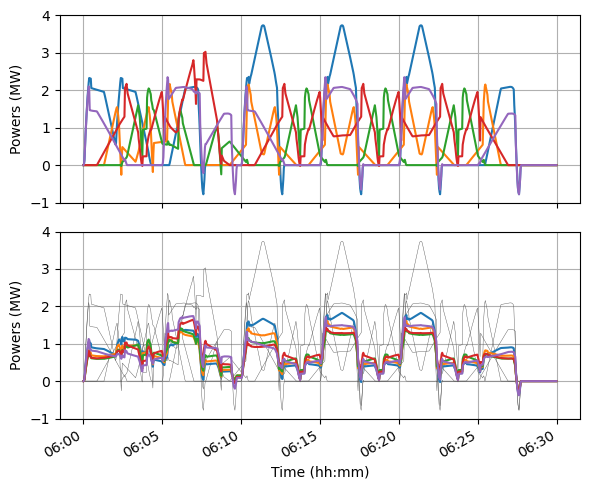

In [32]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 5), dpi=100)

t_rel =  times 
tdate = t_rel.astype('m8[s]')+np.array(['2016-01-14T06:00:00'], dtype='M8[s]') 
        
axes[0].plot(tdate,grid_railway.powers_dc/1e6, label = '')

axes[1].plot(tdate,grid_railway.powers_dc/1e6, label = '', lw=0.3, color='#555555')
axes[1].plot(tdate,grid_railway_droop.powers_dc/1e6, label = '')

for ax in axes:
    ax.set_ylim((-1,4))
    ax.grid()
    ax.set_ylabel('Powers (MW)')
    ax.format_xdata = mdates.DateFormatter('%H-%M')
    xfmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()

ax.set_xlabel('Time (hh:mm)')

fig.tight_layout()
fig

### Voltages

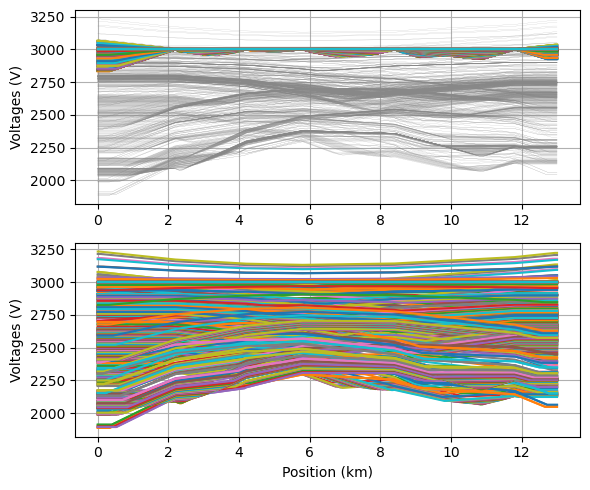

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6, 5), dpi=100)

N_t = grid_railway_droop.voltages_dc.shape[0]

for it in range(N_t):
    axes[0].plot(grid_railway.node_pos[it]/1e3,grid_railway.voltages_dc[it], label = 'V')
    axes[0].plot(grid_railway_droop.node_pos[it]/1e3,grid_railway_droop.voltages_dc[it], label = 'V', lw=0.08, color='#888888' )
    axes[1].plot(grid_railway_droop.node_pos[it]/1e3,grid_railway_droop.voltages_dc[it], label = 'V')

for ax in axes:
    #ax.set_ylim((-1,4))
    ax.grid()
    ax.set_ylabel('Voltages (V)')
    
line_trains = axes[1].plot([],[], 'o', label = 'trains')
axes[1].set_xlabel('Position (km)')
fig.tight_layout()
fig

## Railway traffic

In [34]:
import pandas as pd

data_input = load('trains_lv_5vsc_params.json')   # See at the end of the notebook for .json creation

trains = data_input['trains']

df=pd.DataFrame(columns=['t'])
#df.t=time_h
fig_schedule, (ax_schedule) = plt.subplots(nrows=1, figsize=(7,7.0) )

for train in trains:
    
    if train['direction']=='right':
        x = np.array(data_input['trips']['right']['positions'])
        t_rel =  np.array(data_input['trips']['right']['times']) + train['t_ini']*60 
        t = t_rel.astype('m8[s]')+np.array(['2016-01-14T06:00:00'], dtype='M8[s]') 
        color = '#d9534f'
    if train['direction']=='left':
        x = np.array(data_input['trips']['left']['positions'])
        df=pd.DataFrame(columns=['t'])
        t_rel =   np.array(data_input['trips']['left']['times']) + train['t_ini']*60 
        t = t_rel.astype('m8[s]')+np.array(['2016-01-14T06:00:00'], dtype='M8[s]') 
        color = '#5cb85c'
        
    ax_schedule.plot(t,x/1.0e3,color = color) 

t_ini = np.array(['2016-01-14T06:00:00'], dtype='M8[s]') 
t_end = np.array(['2016-01-14T06:30:00'], dtype='M8[s]')   
for vsc in data_input['grid_formers']:
    ax_schedule.plot([t_ini, t_end],[vsc['position']/1.0e3]*2,color = '#337ab7')
    
ax_schedule.set_xlim([t_ini, t_end])   
ax_schedule.set_xlabel('Position (km)')
ax_schedule.set_xlabel('Time (hh:mm)')
ax_schedule.set_ylim((0, 13))

ax_schedule.grid(True)
ax_schedule.set_ylabel('Position (km)')
ax_schedule.format_xdata = mdates.DateFormatter('%H-%M')
xfmt = mdates.DateFormatter('%H:%M')
ax_schedule.xaxis.set_major_formatter(xfmt)
fig_schedule.autofmt_xdate()

In [40]:
update_trains(10,grid_railway)
grid_railway.report_y()

v_B2lv_a_r = 735.65
v_B2lv_a_i = -445.98
v_B2lv_b_r = -754.06
v_B2lv_b_i = -414.10
v_B2lv_c_r = 18.41
v_B2lv_c_i = 860.08
v_B2lv_n_r =  0.00
v_B2lv_n_i = -0.00
v_B3lv_a_r = 748.50
v_B3lv_a_i = -433.43
v_B3lv_b_r = -749.61
v_B3lv_b_i = -431.50
v_B3lv_c_r =  1.11
v_B3lv_c_i = 864.93
v_B3lv_n_r =  0.00
v_B3lv_n_i =  0.00
v_B4lv_a_r = 748.49
v_B4lv_a_i = -433.49
v_B4lv_b_r = -749.66
v_B4lv_b_i = -431.47
v_B4lv_c_r =  1.17
v_B4lv_c_i = 864.96
v_B4lv_n_r = -0.00
v_B4lv_n_i =  0.00
v_B5lv_a_r = 748.53
v_B5lv_a_i = -433.19
v_B5lv_b_r = -749.41
v_B5lv_b_i = -431.65
v_B5lv_c_r =  0.89
v_B5lv_c_i = 864.84
v_B5lv_n_r =  0.00
v_B5lv_n_i =  0.00
v_B6lv_a_r = 735.88
v_B6lv_a_i = -445.67
v_B6lv_b_r = -753.90
v_B6lv_b_i = -414.46
v_B6lv_c_r = 18.02
v_B6lv_c_i = 860.13
v_B6lv_n_r =  0.00
v_B6lv_n_i = -0.00
v_B2_a_r = 11531.26
v_B2_a_i = -12.68
v_B2_b_r = -5776.61
v_B2_b_i = -9980.02
v_B2_c_r = -5754.65
v_B2_c_i = 9992.70
v_B3_a_r = 11532.42
v_B3_a_i = -14.84
v_B3_b_r = -5779.06
v_B3_b_i = -9979.95
v_B3_

## Grid

In [2]:
from grid_mv import grid_mv_class
grid = grid_mv_class()

In [35]:
grid.initialize([{}],"grid_mv_xy_0_dict.json")
grid.report_y()

NameError: name 'grid' is not defined

## Railway

In [4]:
from railway_5vsc import railway_5vsc_class

railway = railway_5vsc_class()
data_input = load('trains_lv_5vsc_params.json')   # See at the end of the notebook for .json creation

In [5]:
railway.initialize([{}],100)

True

In [6]:
train_positions_list,train_powers_list = trains_update(100,data_input['trains'],data_input['trips'])
railway.ss()

In [ ]:
fig_v, axes = plt.subplots(nrows=len(simus), figsize=(7,8), sharex=True) 

for simu,ax in zip(simus,axes):    
    for it_vsc in range(len(simu['vscs'])):  
        ax.plot(simu['date_time'],simu['data']['V_vsc_out'][:,it_vsc]/1000.0)
    ax.set_ylim([20,27])
    ax.set_xlim([simu['date_time'][0],simu['date_time'].iloc[-1]])
    ax.grid(True)
    ax.set_ylabel('Voltage (kV)')
    lab = ax.get_xticklabels()

axes[0].legend(['VSC1','VSC2','VSC3','VSC4','VSC5'],ncol=3,loc='best')
ax.set_xlabel('Time (hh:mm:ss)')

xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
fig_v.autofmt_xdate()


In [34]:
buses = [f"v_{bus['bus']}" for bus in data_input['buses']]

In [38]:
params_dict,nodes_dict = trains2params(data_input['sections'],train_positions_list,train_powers_list,r_m) 